In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv("Input_10K_sample_MVP_filtering_1116.csv")

In [3]:
data[:5]

,Sentence #,Word,Tag
0,Sentence: 1,diversibit,Other
1,NaN,kit,Other
2,Sentence: 2,iv,Other
3,NaN,2g,Other
4,NaN,gfci,Other


In [4]:
print('number of dataframe rows : {}'.format(len(data)))

number of dataframe rows : 30078


In [5]:
print('Whether there are null values in the data : ' + str(data.isnull().values.any()))

Whether there are null values in the data : True


In [6]:
print('Print which columns contain null values')
print('==============================')
data.isnull().sum()

Print which columns contain null values


Sentence #    20078
Word              0
Tag               0
dtype: int64

In [7]:
print('sentence # The number of deduplicated values in the column : {}'.format(data['Sentence #'].nunique()))
print('Word The number of deduplicated values in the column : {}'.format(data.Word.nunique()))
print('Tag The number of deduplicated values in the column : {}'.format(data.Tag.nunique()))

sentence # The number of deduplicated values in the column : 10000
Word The number of deduplicated values in the column : 4985
Tag The number of deduplicated values in the column : 50


In [8]:
print('Tag count the number of each value in the column')
print('================================')
print(data.groupby('Tag').size().reset_index(name='count'))

Tag count the number of each value in the column
                                Tag  count
0   3 Phase Drive Horsepower Rating    335
1                 Additional Detail      3
2                              Amps    694
3                       Application    266
4                     Assembly Type     81
5                        Cable Type    235
6                          Capacity     29
7                          Category     29
8                      Coil Voltage    384
9                             Color    352
10                  Conductor Count     25
11                   Conductor Type     43
12                   Connector Type    202
13                   Container Size      1
14                            Depth    141
15                         Diameter     56
16                            Drive    138
17                       Drive Size    154
18                   Edge Thickness      2
19                     Fixture Type     51
20                     For Use With      3
21   

In [9]:
data = data.fillna(method="ffill")

In [10]:
print(data.tail())

            Sentence #     Word     Tag
30073   Sentence: 9999    clamp   Other
30074  Sentence: 10000     18in  Length
30075  Sentence: 10000      mag   Other
30076  Sentence: 10000  pick-up   Other
30077  Sentence: 10000     tool   Other


In [11]:
print('to the data Null whether or not there is a value : ' + str(data.isnull().values.any()))

to the data Null whether or not there is a value : False


In [12]:
data['Word'] = data['Word'].str.lower()
print('Word The number of deduplicated values in the column : {}'.format(data.Word.nunique()))

Word The number of deduplicated values in the column : 4985


In [13]:
print(data[:5])

    Sentence #        Word    Tag
0  Sentence: 1  diversibit  Other
1  Sentence: 1         kit  Other
2  Sentence: 2          iv  Other
3  Sentence: 2          2g  Other
4  Sentence: 2        gfci  Other


In [14]:
func = lambda temp: [(w, t) for w, t in zip(temp["Word"].values.tolist(), temp["Tag"].values.tolist())]
tagged_sentences=[t for t in data.groupby("Sentence #").apply(func)]
print("Total number of samples: {}".format(len(tagged_sentences)))

Total number of samples: 10000


In [15]:
print(tagged_sentences[0]) # first sample output

[('diversibit', 'Other'), ('kit', 'Other')]


In [16]:
sentences, ner_tags = [], [] 
for tagged_sentence in tagged_sentences: # Load one sentence sample at a time.
    sentence, tag_info = zip(*tagged_sentence) # In each sample, the words are sent to the sentence, and the entity name tagging information is tag_info save to.
    sentences.append(list(sentence)) # Stores only word information in each sample.
    ner_tags.append(list(tag_info)) # Stores only entity name tagging information in each sample.

In [17]:
print(sentences[0])
print(ner_tags[0])

['diversibit', 'kit']
['Other', 'Other']


In [18]:
print(sentences[98])
print(ner_tags[98])

['wndw', 'door', 'fits']
['Type', 'Type', 'Other']


sample length : 7
average length of samples : 3.007800


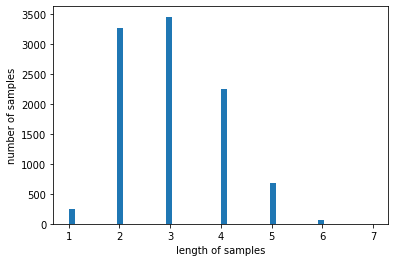

In [19]:
print('sample length : %d' % max(len(l) for l in sentences))
print('average length of samples : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [20]:
src_tokenizer = Tokenizer(oov_token='OOV') # Use all words, but assign the word 'OOV' to index 1.
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer(lower=False) # Tagging information is internally stored with uppercase letters preserved.
tar_tokenizer.fit_on_texts(ner_tags)

In [21]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('size of word set : {}'.format(vocab_size))
print('Size of object name tagging information set : {}'.format(tag_size))

size of word set : 4987
Size of object name tagging information set : 51


In [22]:
print('index of word OOV : {}'.format(src_tokenizer.word_index['OOV']))

index of word OOV : 1


In [23]:
X_data = src_tokenizer.texts_to_sequences(sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [24]:
print(X_data[0])
print(y_data[0])

[2328, 32]
[1, 1]


In [25]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

In [26]:
print(index_to_ner)

{1: 'Other', 2: 'Type', 3: 'Amps', 4: 'Material', 5: 'Number of Poles', 6: 'Voltage', 7: 'Voltage Maximum', 8: 'Coil Voltage', 9: 'Phase', 10: 'Size', 11: 'Color', 12: '3 Phase Drive Horsepower Rating', 13: 'Length', 14: 'Speed Rating', 15: 'Trade Size', 16: 'Application', 17: 'Cable Type', 18: 'NEMA', 19: 'Connector Type', 20: 'Height', 21: 'Drive Size', 22: 'Depth', 23: 'Drive', 24: 'Installation', 25: 'Width', 26: 'Point', 27: 'Socket Depth', 28: 'Assembly Type', 29: 'Overload Relay', 30: 'Lamp Type', 31: 'Stud Holes', 32: 'Diameter', 33: 'Fixture Type', 34: 'Watts', 35: 'Conductor Type', 36: 'Legend - Number', 37: 'Capacity', 38: 'Category', 39: 'Grade', 40: 'Conductor Count', 41: 'Label Width', 42: 'Use With', 43: 'Product Type', 44: 'Tester Type', 45: 'Mounting Size', 46: 'Grit/ANSI Type', 47: 'For Use With', 48: 'Additional Detail', 49: 'Edge Thickness', 50: 'Container Size', 0: 'PAD'}


In [27]:
decoded = []
for index in X_data[0] : # for indices in the first sample
    decoded.append(index_to_word[index]) # convert back to words

print('an existing sentence : {}'.format(sentences[0]))
print('decoding sentence : {}'.format(decoded))

an existing sentence : ['diversibit', 'kit']
decoding sentence : ['diversibit', 'kit']


In [28]:
max_len = 7
X_data = pad_sequences(X_data, padding='post', maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

In [29]:
print(X_data.shape)
print(y_data.shape)

(10000, 7)
(10000, 7)


In [30]:
X_train, X_test, y_train_int, y_test_int = train_test_split(X_data, y_data, test_size=0.15, random_state=777)

In [31]:
y_train = to_categorical(y_train_int, num_classes=tag_size)
y_test = to_categorical(y_test_int, num_classes=tag_size)

In [32]:
print('Size of training sample sentences : {}'.format(X_train.shape))
print('Size of training sample labels (integer encoding) : {}'.format(y_train_int.shape))
print('Size of training sample labels (one-hot encoding) : {}'.format(y_train.shape))
print('Size of test sample sentences : {}'.format(X_test.shape))
print('Size of test sample labels (integer encoding) : {}'.format(y_test_int.shape))
print('Size of test sample labels (one-hot encoding) : {}'.format(y_test.shape))

Size of training sample sentences : (8500, 7)
Size of training sample labels (integer encoding) : (8500, 7)
Size of training sample labels (one-hot encoding) : (8500, 7, 51)
Size of test sample sentences : (1500, 7)
Size of test sample labels (integer encoding) : (1500, 7)
Size of test sample labels (one-hot encoding) : (1500, 7, 51)


In [33]:
# Existing sentence before integer encoding
print(sentences[0])

['diversibit', 'kit']


In [34]:
print(X_data[0])

[2328   32    0    0    0    0    0]


In [35]:
print(X_train[0])

[ 17 265 119   0   0   0   0]


In [36]:
print(index_to_word[3829])

plaster


In [37]:
print('Size of training sample sentences : {}'.format(X_train.shape))
print('size of training sample labels : {}'.format(y_train.shape))
print('Size of test sample sentences : {}'.format(X_test.shape))
print('Size of test sample label : {}'.format(y_test.shape))

Size of training sample sentences : (8500, 7)
size of training sample labels : (8500, 7, 51)
Size of test sample sentences : (1500, 7)
Size of test sample label : (1500, 7, 51)


In [38]:
X_test[0]

array([2149, 3829,  164,    0,    0,    0,    0])

# BiLSTM

## modelling

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

In [40]:
embedding_dim = 128
hidden_units = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         638336    
                                                                 
 bidirectional (Bidirectiona  (None, None, 512)        788480    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, None, 51)         26163     
 ibuted)                                                         
                                                                 
Total params: 1,452,979
Trainable params: 1,452,979
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.15)

Epoch 1/50
57/57 [==============================] - 10s 81ms/step - loss: 1.1993 - accuracy: 0.4827 - val_loss: 0.8109 - val_accuracy: 0.5364
Epoch 2/50
57/57 [==============================] - 3s 50ms/step - loss: 0.7192 - accuracy: 0.5571 - val_loss: 0.6630 - val_accuracy: 0.6019
Epoch 3/50
57/57 [==============================] - 3s 51ms/step - loss: 0.5692 - accuracy: 0.6459 - val_loss: 0.5878 - val_accuracy: 0.6275
Epoch 4/50
57/57 [==============================] - 3s 52ms/step - loss: 0.4793 - accuracy: 0.6879 - val_loss: 0.5327 - val_accuracy: 0.6536
Epoch 5/50
57/57 [==============================] - 3s 52ms/step - loss: 0.4051 - accuracy: 0.7291 - val_loss: 0.4969 - val_accuracy: 0.6710
Epoch 6/50
57/57 [==============================] - 3s 50ms/step - loss: 0.3486 - accuracy: 0.7597 - val_loss: 0.4763 - val_accuracy: 0.6901
Epoch 7/50
57/57 [==============================] - 3s 50ms/step - loss: 0.3008 - accuracy: 0.7901 - val_loss: 0.4642 - val_accuracy: 0.7002
Epoch 8/50
5

In [43]:
model.save('bilstm.h5')

In [44]:
i = 13 # The index of the test sample you want to check.
y_predicted = model.predict(np.array([X_test[i]]))[0] # Returns prediction y for the input test sample
y_predicted = np.argmax(y_predicted, axis=-1) # Change the probability vector to integer encoding.
true = np.argmax(y_test[i], -1) # Changed one-hot encoding back to integer encoding.

print("{:15}|{:5}|{}".format("word", "actual value", "predicted value"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], true, y_predicted):
    if word != 0: # PAD value is excluded.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

1/1 [==============================] - 2s 2s/step
word           |actual value|predicted value
-----------------------------------
24v              : Other   Other
motor            : Other   Other
oprtr            : Other   Other


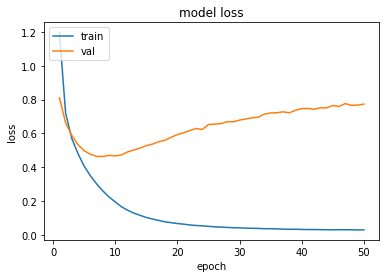

In [45]:
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
from seqeval.metrics import f1_score, classification_report

In [47]:
def sequences_to_tag(sequences): # predicted value index_to_ner Function to change to tagging information using.
    result = []
    for sequence in sequences: # Retrieves a sequence one by one from the entire sequence.
        temp = []
        for pred in sequence: # Extract predictions from the sequence one by one..
            pred_index = np.argmax(pred) # for example [0, 0, 1, 0 ,0] If so, returns 2, the index of 1..
            temp.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD'change to 'O'
        result.append(temp)
    return result

In [48]:
y_predicted = model.predict([X_test])
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)

47/47 [==============================] - 2s 9ms/step


In [49]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from itertools import chain
def tags_classification_report(y_true, y_pred):
    
    lb = LabelBinarizer()
    y_true_combined = lb.fit_transform(list(chain.from_iterable(y_true)))
    y_pred_combined = lb.transform(list(chain.from_iterable(y_pred)))
        
    tagset = set(lb.classes_) - {'O', 'PAD'}
    tagset = sorted(tagset, key=lambda tag: tag.split('-', 1)[::-1])
    class_indices = {cls: idx for idx, cls in enumerate(lb.classes_)}
    
    return classification_report(
        y_true_combined,
        y_pred_combined,
        labels = [class_indices[cls] for cls in tagset],
        target_names = tagset,
    )
    lb = LabelBinarizer()
    y_true_combined = lb.fit_transform(list(chain.from_iterable(y_true)))
    y_pred_combined = lb.transform(list(chain.from_iterable(y_pred)))
        
    tagset = set(lb.classes_) - {'O'}
    tagset = sorted(tagset, key=lambda tag: tag.split('-', 1)[::-1])
    class_indices = {cls: idx for idx, cls in enumerate(lb.classes_)}
    
    return classification_report(
        y_true_combined,
        y_pred_combined,
        labels = [class_indices[cls] for cls in tagset],
        target_names = tagset,
    )

In [50]:
print(tags_classification_report(test_tags, pred_tags))

                                 precision    recall  f1-score   support

3 Phase Drive Horsepower Rating       0.96      0.96      0.96        48
                           Amps       0.76      0.77      0.76       108
                    Application       0.57      0.41      0.48        39
                  Assembly Type       0.55      0.79      0.65        14
                     Cable Type       0.86      0.76      0.81        33
                       Capacity       1.00      0.33      0.50         3
                       Category       1.00      0.60      0.75         5
                   Coil Voltage       0.86      0.97      0.91        59
                          Color       0.73      0.32      0.45        59
                Conductor Count       0.00      0.00      0.00         4
                 Conductor Type       0.67      0.67      0.67         9
                 Connector Type       0.30      0.25      0.27        24
                          Depth       0.38      0.

C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

## Performance

In [51]:
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

F1-score: 64.2%


C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Other seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Material seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Type seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Voltage seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Color seems not to be NE tag.
 

# BiLSTM-CRF

## modelling

In [52]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Attention, Dense, LSTM, Input, Bidirectional, TimeDistributed, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras_crf import CRFModel
from seqeval.metrics import f1_score, classification_report

In [53]:
embedding_dim = 128
hidden_units = 64
dropout_ratio = 0.3

sequence_input = Input(shape=(max_len,),dtype=tf.int32, name='sequence_input')

model_embedding = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=max_len)(sequence_input)

model_bilstm = Bidirectional(LSTM(units=hidden_units, return_sequences=True))(model_embedding)

model_dropout = TimeDistributed(Dropout(dropout_ratio))(model_bilstm)

model_dense = TimeDistributed(Dense(tag_size, activation='relu'))(model_dropout)

base = Model(inputs=sequence_input, outputs=model_dense)
model = CRFModel(base, tag_size)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), metrics='accuracy')
model.summary()

Model: "crf_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence_input (InputLayer)    [(None, 7)]          0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 7, 128)       638336      ['sequence_input[0][0]']         
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 7, 128)      98816       ['embedding_1[0][0]']            
 )                                                                                                
                                                                                                  
 time_distributed_1 (TimeDistri  (None, 7, 128)      0           ['bidirectional_1[0][0]']

In [54]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_crf/cp.ckpt', monitor='val_decode_sequence_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)

In [55]:
history = model.fit(X_train, y_train_int, batch_size=128, epochs=50, validation_split=0.15, callbacks=[mc, es])

Epoch 1/50
55/57 [===========================>..] - ETA: 0s - decode_sequence_accuracy: 0.6295 - loss: 14.6423
Epoch 1: val_decode_sequence_accuracy improved from -inf to 0.75798, saving model to bilstm_crf\cp.ckpt
57/57 [==============================] - 6s 50ms/step - decode_sequence_accuracy: 0.6324 - loss: 14.2278 - val_decode_sequence_accuracy: 0.7580 - val_loss: 7.1397
Epoch 2/50
55/57 [===========================>..] - ETA: 0s - decode_sequence_accuracy: 0.7669 - loss: 6.1622
Epoch 2: val_decode_sequence_accuracy improved from 0.75798 to 0.79272, saving model to bilstm_crf\cp.ckpt
57/57 [==============================] - 2s 32ms/step - decode_sequence_accuracy: 0.7671 - loss: 6.1619 - val_decode_sequence_accuracy: 0.7927 - val_loss: 6.0233
Epoch 3/50
55/57 [===========================>..] - ETA: 0s - decode_sequence_accuracy: 0.7991 - loss: 5.4664
Epoch 3: val_decode_sequence_accuracy improved from 0.79272 to 0.80639, saving model to bilstm_crf\cp.ckpt
57/57 [===================

In [56]:
model.load_weights('bilstm_crf/cp.ckpt')

In [57]:
i = 13 # The index of the test sample you want to check.
y_predicted = model.predict(np.array([X_test[i]]))[0] # Returns prediction y for the input test sample
true = np.argmax(y_test[i], -1) # Changed one-hot encoding back to integer encoding.

print("{:15}|{:5}|{}".format("word", "actual value", "predicted value"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], true, y_predicted[0]):
    if word != 0: # Excluding PAD value.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

1/1 [==============================] - 1s 642ms/step
word           |actual value|predicted value
-----------------------------------
24v              : Other   Other
motor            : Other   Other
oprtr            : Other   Other


In [58]:
y_predicted = model.predict(X_test)[0]

47/47 [==============================] - 0s 3ms/step


In [59]:
def sequences_to_tag(sequences): # predicted value index_to_ner Function to change to tagging information using.
    result = []
    for sequence in sequences: # Retrieves a sequence one by one from the entire sequence.
        temp = []
        for pred in sequence: # Extract predictions from the sequence one by one..
            pred_index = np.argmax(pred) # for example [0, 0, 1, 0 ,0] If so, returns 2, the index of 1..
            temp.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD'change to 'O'
        result.append(temp)
    return result

In [60]:
def sequences_to_tag_for_crf(sequences): # A function that changes predictions to tagging information using index_to_ner.
    result = []
    for sequence in sequences: # Retrieves a sequence one by one from the entire sequence.
        temp = []
        for pred in sequence: # Extract the predicted values from the sequence one by one.
            # pred_index = np.argmax(pred) # For example, [0, 0, 1, 0, 0] returns 2, which is the index of 1..
            pred_index = pred
            temp.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD' changed to 'O'
        result.append(temp)
    return result

In [61]:
pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from itertools import chain
def tags_classification_report(y_true, y_pred):
    
    lb = LabelBinarizer()
    y_true_combined = lb.fit_transform(list(chain.from_iterable(y_true)))
    y_pred_combined = lb.transform(list(chain.from_iterable(y_pred)))
        
    tagset = set(lb.classes_) - {'O', 'PAD'}
    tagset = sorted(tagset, key=lambda tag: tag.split('-', 1)[::-1])
    class_indices = {cls: idx for idx, cls in enumerate(lb.classes_)}
    
    return classification_report(
        y_true_combined,
        y_pred_combined,
        labels = [class_indices[cls] for cls in tagset],
        target_names = tagset,
    )
    lb = LabelBinarizer()
    y_true_combined = lb.fit_transform(list(chain.from_iterable(y_true)))
    y_pred_combined = lb.transform(list(chain.from_iterable(y_pred)))
        
    tagset = set(lb.classes_) - {'O'}
    tagset = sorted(tagset, key=lambda tag: tag.split('-', 1)[::-1])
    class_indices = {cls: idx for idx, cls in enumerate(lb.classes_)}
    
    return classification_report(
        y_true_combined,
        y_pred_combined,
        labels = [class_indices[cls] for cls in tagset],
        target_names = tagset,
    )

In [63]:
print(tags_classification_report(test_tags, pred_tags))

                                 precision    recall  f1-score   support

3 Phase Drive Horsepower Rating       0.94      0.96      0.95        48
                           Amps       0.77      0.78      0.77       108
                    Application       0.58      0.28      0.38        39
                  Assembly Type       0.83      0.71      0.77        14
                     Cable Type       0.88      0.64      0.74        33
                       Capacity       0.00      0.00      0.00         3
                       Category       1.00      0.60      0.75         5
                   Coil Voltage       0.87      0.88      0.87        59
                          Color       0.50      0.29      0.37        59
                Conductor Count       0.00      0.00      0.00         4
                 Conductor Type       1.00      0.11      0.20         9
                 Connector Type       0.27      0.17      0.21        24
                          Depth       0.50      0.

C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

In [64]:
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

F1-score: 61.5%


C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Other seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Material seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Type seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Voltage seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Color seems not to be NE tag.
 

# BiLSTM-BiLSTM-CRF

## Modelling

In [65]:
embedding_dim = 128
dropout_ratio = 0.3
hidden_units = 64

word_ids = Input(batch_shape=(None, None), dtype='int32', name='word_input')
word_embeddings = Embedding(input_dim=vocab_size,
                                        output_dim=embedding_dim,
                                        name='word_embedding')(word_ids)

word_embeddings = Dropout(dropout_ratio)(word_embeddings)
output = Bidirectional(LSTM(units=hidden_units, return_sequences=True))(word_embeddings)
output = TimeDistributed(Dense(tag_size, activation='relu'))(output)
base = Model(inputs=word_ids, outputs=[output])
model = CRFModel(base, tag_size)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), metrics='accuracy')

model.summary()

Model: "crf_model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 word_input (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 word_embedding (Embedding)     (None, None, 128)    638336      ['word_input[0][0]']             
                                                                                                  
 dropout_1 (Dropout)            (None, None, 128)    0           ['word_embedding[0][0]']         
                                                                                                  
 bidirectional_2 (Bidirectional  (None, None, 128)   98816       ['dropout_1[0][0]']              
 )                                                                                      

In [66]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_bilstm_crf/cp.ckpt', monitor='val_decode_sequence_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)

In [67]:
history = model.fit(X_train, y_train_int, batch_size=128, epochs=50, validation_split=0.15, callbacks=[mc, es])

Epoch 1/50
57/57 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.6596 - loss: 15.2444
Epoch 1: val_decode_sequence_accuracy improved from -inf to 0.75036, saving model to bilstm_bilstm_crf\cp.ckpt
57/57 [==============================] - 6s 53ms/step - decode_sequence_accuracy: 0.6596 - loss: 15.0872 - val_decode_sequence_accuracy: 0.7504 - val_loss: 7.1927
Epoch 2/50
57/57 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.7603 - loss: 6.1894
Epoch 2: val_decode_sequence_accuracy improved from 0.75036 to 0.77064, saving model to bilstm_bilstm_crf\cp.ckpt
57/57 [==============================] - 2s 40ms/step - decode_sequence_accuracy: 0.7603 - loss: 6.1798 - val_decode_sequence_accuracy: 0.7706 - val_loss: 6.2045
Epoch 3/50
57/57 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.7956 - loss: 5.4728
Epoch 3: val_decode_sequence_accuracy improved from 0.77064 to 0.80291, saving model to bilstm_bilstm_crf\cp.ckpt
57/57

In [68]:
model.load_weights('bilstm_bilstm_crf/cp.ckpt')

In [69]:
i = 13 # The index of the test sample you want to check.
y_predicted = model.predict(np.array([X_test[i]]))[0] # Returns prediction y for the input test sample
true = np.argmax(y_test[i], -1) # Changed one-hot encoding back to integer encoding.

print("{:15}|{:5}|{}".format("word", "actual value", "predicted value"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], true, y_predicted[0]):
    if word != 0: # Excluding PAD value.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

1/1 [==============================] - 1s 721ms/step
word           |actual value|predicted value
-----------------------------------
24v              : Other   Other
motor            : Other   Other
oprtr            : Other   Other


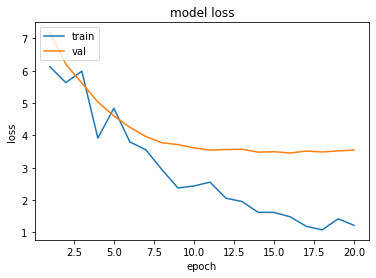

In [70]:
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [71]:
y_predicted = model.predict(X_test)[0]
pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

47/47 [==============================] - 0s 4ms/step


In [72]:
print(tags_classification_report(test_tags, pred_tags))

                                 precision    recall  f1-score   support

3 Phase Drive Horsepower Rating       0.98      0.85      0.91        48
                           Amps       0.82      0.80      0.81       108
                    Application       0.57      0.33      0.42        39
                  Assembly Type       0.83      0.71      0.77        14
                     Cable Type       0.85      0.67      0.75        33
                       Capacity       0.00      0.00      0.00         3
                       Category       1.00      0.80      0.89         5
                   Coil Voltage       0.93      0.86      0.89        59
                          Color       0.61      0.34      0.43        59
                Conductor Count       0.00      0.00      0.00         4
                 Conductor Type       0.78      0.78      0.78         9
                 Connector Type       0.37      0.29      0.33        24
                          Depth       0.64      0.

C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

## Performance

In [73]:
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

F1-score: 64.4%


C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Other seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Material seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Type seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Voltage seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: Color seems not to be NE tag.
 

## BiLSTM-Attention-CRF

In [75]:
from keras_self_attention import SeqSelfAttention

In [123]:
embedding_dim = 128
dropout_ratio = 0.3
hidden_units = 400

word_ids = Input(batch_shape=(None, None), dtype='int32', name='word_input')
word_embeddings = Embedding(input_dim=vocab_size,
                                        output_dim=embedding_dim,
                                        name='word_embedding')(word_ids)

word_embeddings = Dropout(dropout_ratio)(word_embeddings)
bilstm_layer1 = Bidirectional(LSTM(units=hidden_units, return_sequences=True))(word_embeddings)
bilstm_drop = Dropout(dropout_ratio)(bilstm_layer1)
bilstm_layer2 = Bidirectional(LSTM(units=hidden_units, return_sequences=True))(bilstm_drop)
output = TimeDistributed(Dense(tag_size, activation='relu'))(bilstm_layer2)
attention_layer = SeqSelfAttention(attention_activation='sigmoid',
                                name='Attention')(output)
base = Model(word_ids, attention_layer)

model = CRFModel(base, tag_size)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), metrics='accuracy')

model.summary()

Model: "crf_model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 word_input (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 word_embedding (Embedding)     (None, None, 128)    638336      ['word_input[0][0]']             
                                                                                                  
 dropout_7 (Dropout)            (None, None, 128)    0           ['word_embedding[0][0]']         
                                                                                                  
 bidirectional_8 (Bidirectional  (None, None, 800)   1692800     ['dropout_7[0][0]']              
 )                                                                                      

C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [125]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_attention_crfV0.1/cp.ckpt', monitor='val_decode_sequence_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)

In [126]:
history = model.fit(X_train, y_train_int, batch_size=128, epochs=50, validation_split=0.15, callbacks=[mc, es])

Epoch 1/50
57/57 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.5487 - loss: 12.4010
Epoch 1: val_decode_sequence_accuracy improved from -inf to 0.56706, saving model to bilstm_attention_crfV0.1\cp.ckpt
57/57 [==============================] - 20s 264ms/step - decode_sequence_accuracy: 0.5487 - loss: 12.3514 - val_decode_sequence_accuracy: 0.5671 - val_loss: 10.3078
Epoch 2/50
57/57 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.6278 - loss: 8.6944
Epoch 2: val_decode_sequence_accuracy improved from 0.56706 to 0.75216, saving model to bilstm_attention_crfV0.1\cp.ckpt
57/57 [==============================] - 14s 239ms/step - decode_sequence_accuracy: 0.6278 - loss: 8.6651 - val_decode_sequence_accuracy: 0.7522 - val_loss: 7.0764
Epoch 3/50
57/57 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.7774 - loss: 5.8455
Epoch 3: val_decode_sequence_accuracy improved from 0.75216 to 0.78790, saving model to bilstm_atten

57/57 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9059 - loss: 1.5614
Epoch 23: val_decode_sequence_accuracy did not improve from 0.85658
57/57 [==============================] - 17s 300ms/step - decode_sequence_accuracy: 0.9059 - loss: 1.5619 - val_decode_sequence_accuracy: 0.8539 - val_loss: 3.6288
Epoch 23: early stopping


In [127]:
model.load_weights('bilstm_attention_crfV0.1/cp.ckpt')

In [128]:
i = 55 # The index of the test sample you want to check.
y_predicted = model.predict(np.array([X_test[i]]))[0] # Returns prediction y for the input test sample
true = np.argmax(y_test[i], -1) # Changed one-hot encoding back to integer encoding.

print("{:15}|{:5}|{}".format("word", "actual value", "predicted value"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], true, y_predicted[0]):
    if word != 0: # Excluding PAD value.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

1/1 [==============================] - 1s 1s/step
word           |actual value|predicted value
-----------------------------------
3000rpm          : Speed Rating Speed Rating
mtr              : Type    Type


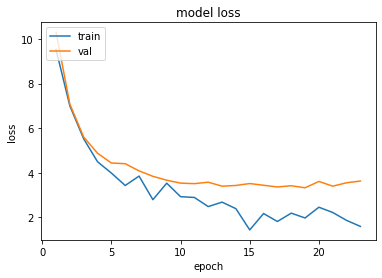

In [129]:
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [130]:
y_predicted = model.predict(X_test)[0]
pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

47/47 [==============================] - 2s 42ms/step


In [131]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from itertools import chain
def tags_classification_report(y_true, y_pred):
    
    lb = LabelBinarizer()
    y_true_combined = lb.fit_transform(list(chain.from_iterable(y_true)))
    y_pred_combined = lb.transform(list(chain.from_iterable(y_pred)))
        
    tagset = set(lb.classes_) - {'O', 'PAD'}
    tagset = sorted(tagset, key=lambda tag: tag.split('-', 1)[::-1])
    class_indices = {cls: idx for idx, cls in enumerate(lb.classes_)}
    
    return classification_report(
        y_true_combined,
        y_pred_combined,
        labels = [class_indices[cls] for cls in tagset],
        target_names = tagset,
    )
    lb = LabelBinarizer()
    y_true_combined = lb.fit_transform(list(chain.from_iterable(y_true)))
    y_pred_combined = lb.transform(list(chain.from_iterable(y_pred)))
        
    tagset = set(lb.classes_) - {'O'}
    tagset = sorted(tagset, key=lambda tag: tag.split('-', 1)[::-1])
    class_indices = {cls: idx for idx, cls in enumerate(lb.classes_)}
    
    return classification_report(
        y_true_combined,
        y_pred_combined,
        labels = [class_indices[cls] for cls in tagset],
        target_names = tagset,
    )

In [132]:
print(tags_classification_report(test_tags, pred_tags))

                                 precision    recall  f1-score   support

3 Phase Drive Horsepower Rating       0.88      0.90      0.89        48
                           Amps       0.63      0.73      0.68       108
                    Application       1.00      0.10      0.19        39
                  Assembly Type       0.80      0.29      0.42        14
                     Cable Type       0.83      0.61      0.70        33
                       Capacity       0.00      0.00      0.00         3
                       Category       0.75      0.60      0.67         5
                   Coil Voltage       0.73      0.81      0.77        59
                          Color       0.14      0.08      0.11        59
                Conductor Count       0.00      0.00      0.00         4
                 Conductor Type       0.67      0.22      0.33         9
                 Connector Type       0.14      0.12      0.13        24
                          Depth       0.36      0.

C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xx07230\Anaconda3\envs\smart_warehouse\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res